In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [410]:
df = pd.read_csv('ETH_HUNT_transactions.csv')

In [411]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df['date_only'] = df['block_timestamp'].dt.date

In [412]:
wa = df[['trx_initiator', 'date_only']]

In [413]:
wa.drop_duplicates(subset=['date_only', 'trx_initiator'], keep='first', inplace=True)

C:\Users\murad\AppData\Local\Temp\ipykernel_1500\3537828283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa.drop_duplicates(subset=['date_only', 'trx_initiator'], keep='first', inplace=True)


In [414]:
wa = wa.groupby('date_only').trx_initiator.count().reset_index()

In [415]:
wa

,date_only,trx_initiator
0,2022-04-08,4
1,2022-04-10,2
2,2022-04-11,3
3,2022-04-12,2
4,2022-04-13,4
...,...,...
290,2023-01-31,3
291,2023-02-01,5
292,2023-02-02,9
293,2023-02-03,3


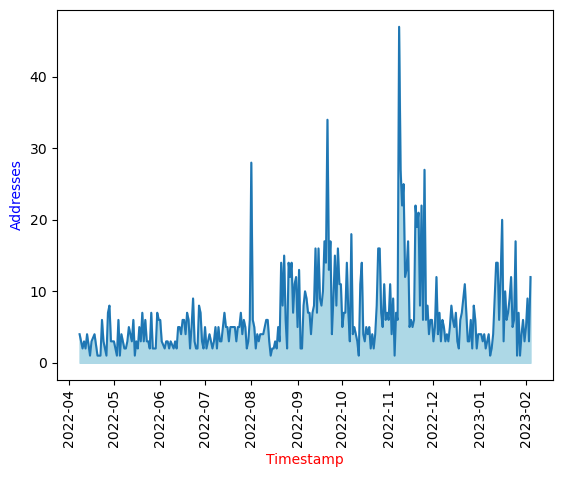

In [416]:
x = wa['date_only']
y = wa['trx_initiator']

plt.fill_between(x, y, color='lightblue')
plt.plot(x, y)
plt.xlabel('Timestamp', color = 'r')
plt.ylabel('Addresses', color = 'b')
plt.xticks(rotation=90)
plt.show()
